# Advanced Numerical Analysis

## Exercise 34

*To solve two-point boundary value problems (BVP) of the form*

$$\begin{cases}
y'' = F(y, y') \\
y(a) = \alpha, y(b) = \beta
\end{cases}$$

*one may consider the initial value problems (IVP)*

$$\begin{cases}
y'' = F(y, y') \\
y(a) = \alpha, y'(a) = s
\end{cases}$$

*with* $s \in \mathbb{R}.$ *Let the solution of the IVP be* $y(t; s).$ *If one can find an initial slope* $s^*$ *for which* $y(b; s^*) = \beta,$ *the function* $y(t) := y(t; s^*)$ *solves the boundary value problem. The desired initial slope is computed iteratively as a root of the residual function* $F(s) := y(b;s) - \beta.$ *To do that, the IVP must be solved in every iteration.*

*Determine the two solutions to the BVP*

$$\begin{cases}
y'' = 1.5 y^2 \\
y(0) = 4, y(1) = 1
\end{cases}$$

*with the shooting method described above. The roots of $F(s)$ may be computed, e.g., via the secant method, using the initial approximations* $2s_0 := 0, s_1 := -10$ and $s_0 := -30, s_1 := -40$ *respectively. In each case solve the IVP with the classical Runge-Kutta method with step size* $h = \frac{1}{32}.$ *For both solutions print both the computed initial slopes* $y'(0)$ *and the values* $y(i h)$ *for* $i = 0, \dots, 32.$

In [52]:
function y_prime = F(t, y)
    # function of BVP
    y_prime = [y(2); 1.5 * y(1)^2];
endfunction

h = 1/32;
t = 0 : h : 1;

y0 = [4; 1];
s0_1 = [0, -10];
s0_2 = [-30, -40];

In [53]:
function y = RK4(F, y0, t)    
    m = length(y0);
    n = length(t);
    y = zeros(m, n);
    y(:,1) = y0;
    
    for k = 1 : n-1
        h = t(k+1) - t(k);
        k1 = F(t(k), y(:,k));
        k2 = F(t(k) + h/2, y(:,k) + h/2 * k1);
        k3 = F(t(k) + h/2, y(:,k) + h/2 * k2);
        k4 = F(t(k+1), y(:,k) + h * k3);
        y(:,k+1) = y(:,k) + h/6 * (k1 + 2*k2 + 2*k3 + k4);
    endfor
endfunction


function solution = solve_BVP(F, y0, t, s0, solver = @RK4, tolerance = 1e-8, max_iterations = 1000)
    slope_1 = s0(1);
    slope_2 = s0(2);
    alpha = y0(1);
    beta = y0(2);
    
    # initial slope 1
    init_val = [alpha, slope_1];
    y = solver(@F, init_val, t)(1,:);
    residual_1 = y(end) - beta;
    
    if abs(residual_1) <= tolerance
        solution = [y, slope_1];
        return
    endif
    
    # initial slope 2
    init_val = [alpha, slope_2];
    y = solver(@F, init_val, t)(1,:);
    residual_2 = y(end) - beta;
    
    if abs(residual_2) <= tolerance
        solution = [y, slope_2];
        return
    endif
    
    # secant method
    for _ = 1 : max_iterations
        slope = (slope_1 * residual_2 - slope_2 * residual_1) / (residual_2 - residual_1);
        
        init_val = [alpha; slope];
        y = solver(@F, init_val, t)(1,:);
        residual = y(end) - beta;
        
        if abs(residual) <= tolerance
            solution = [y, slope];
            return
        endif
        
        slope_1 = slope_2;
        slope_2 = slope;
        residual_1 = residual_2;
        residual_2 = residual;
    endfor
    
    solution = [y, slope];
endfunction

slope_1 = -8.0000
slope_2 = -35.859


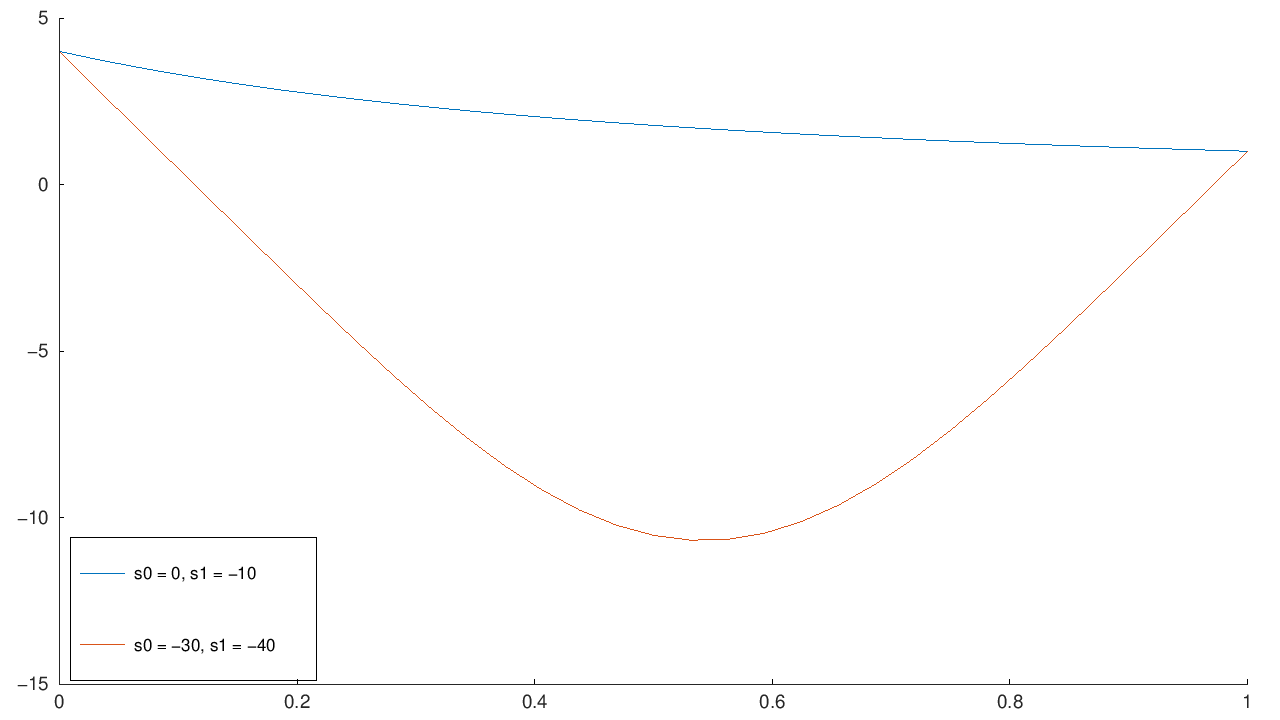

In [54]:
%plot -s 1280,720

solution_1 = solve_BVP(@F, y0, t, s0_1);
y_1 = solution_1(1:end-1);
slope_1 = solution_1(end)

solution_2 = solve_BVP(@F, y0, t, s0_2);
y_2 = solution_2(1:end-1);
slope_2 = solution_2(end)

hold on;
plot(t, y_1)
plot(t, y_2)
str_1 = sprintf("s0 = %g, s1 = %g", s0_1(1), s0_1(2));
str_2 = sprintf("s0 = %g, s1 = %g", s0_2(1), s0_2(2));
legend(str_1, str_2, "location", "southwest");